# WS 01

In [1]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [4]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0][:, 7:20]
X_train[0,:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

In [6]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
np.min(X_train), np.max(X_train)

(0, 255)

In [8]:
np.isnan(X_train).sum()

0

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


<Axes: >

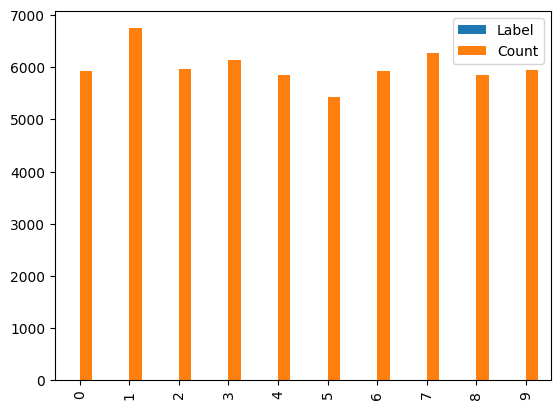

In [10]:
import pandas as pd

label,count = np.unique(y_train, return_counts=True)
label,count
df_train_labels = pd.DataFrame({'Label':label, 'Count':count})
df_train_labels

df_train_labels.plot.bar()

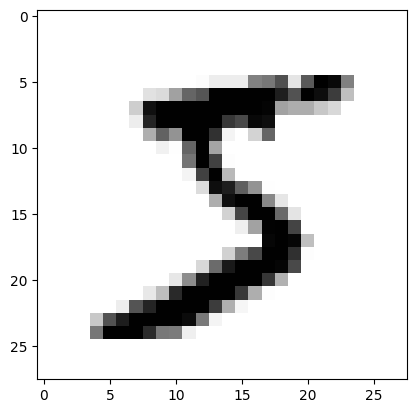

In [11]:
import matplotlib.pyplot as plt

img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray_r) # inverse black bg

plt.show()

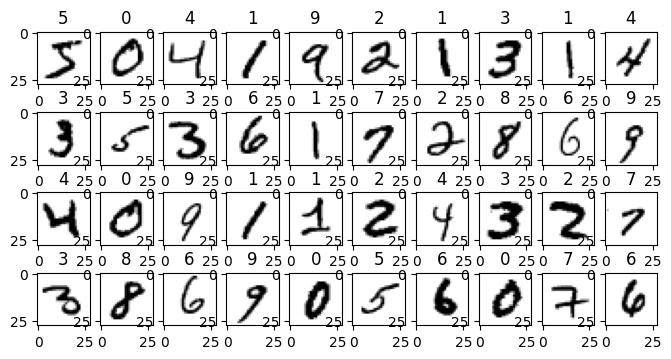

In [12]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(8, 4))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])

    plt.show()

visual_multi(0)

In [13]:
print(X_train.shape)
print(X_test.shape) #X_train.shape

(60000, 28, 28)
(10000, 28, 28)


In [14]:

X_train = np.expand_dims(X_train, -1) # 
X_test = np.expand_dims(X_test, -1)

In [15]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [16]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [17]:
X_train[0,10,10:15]

array([[0.00392157],
       [0.6039216 ],
       [0.99215686],
       [0.3529412 ],
       [0.        ]], dtype=float32)

## select samples

In [18]:
num_samples = 10000

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

In [19]:
X_train.shape

(10000, 28, 28, 1)

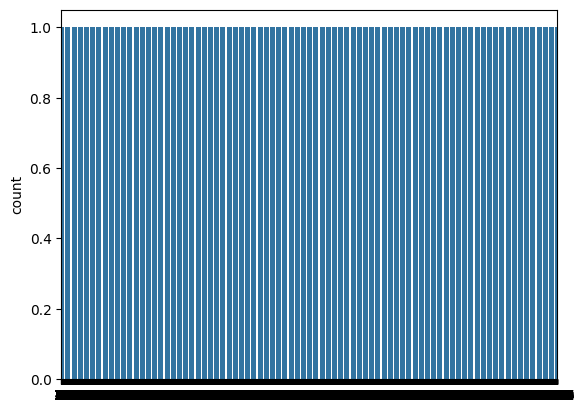

In [20]:
# import warnings
# warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import seaborn as sns

sns.countplot(y_test)

plt.show()
del sns#, warnings

In [21]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


# model 

In [22]:
num_classes = len(np.unique(y_train))
num_classes

10

In [23]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [24]:
in_shape = X_train.shape[1:]
in_shape

(32, 32, 1)

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout # MaxPool2D, 

model = Sequential()
model.add(Conv2D(6, (5,5), activation='tanh', input_shape=in_shape)) 
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(16, (5,5), activation='tanh')) 
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(120, (5,5), activation='tanh')) 

model.add(Flatten())
model.add(Dense(84, activation='tanh')) 

model.add(Dense(num_classes, activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

import time
start = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test,y_test))

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6691 - loss: 1.2690 - val_accuracy: 0.9018 - val_loss: 0.3484
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9024 - loss: 0.3350 - val_accuracy: 0.9186 - val_loss: 0.2758
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9215 - loss: 0.2524 - val_accuracy: 0.9339 - val_loss: 0.2262
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9391 - loss: 0.2001 - val_accuracy: 0.9374 - val_loss: 0.2099
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9515 - loss: 0.1665 - val_accuracy: 0.9443 - val_loss: 0.1839
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9588 - loss: 0.1386 - val_accuracy: 0.9520 - val_loss: 0.1601
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9719 - loss: 0.1073 - val_accuracy: 0.9549 - val_loss: 0.1515
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9693 - loss: 0.1018 - val_accuracy: 0.9568 - val_loss

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {:.3f}'.format(score[1]))

Accuracy: 0.968


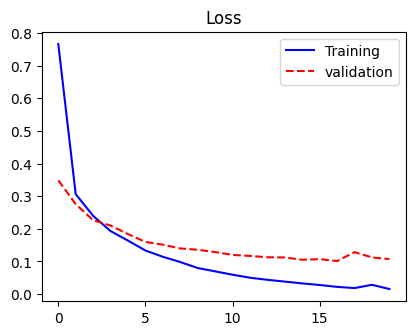

In [29]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('Loss')
plt.legend()
plt.show()